## Fetch and Load data

In [1]:
#fetch MNIST dataset using sci-kit learn
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version = 1)
mnist.keys()

C:\Users\Mary\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

#alternatively load data from keras
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:
import pandas as pd
import numpy as np
x , y= mnist['data'], mnist['target']

In [3]:
print(x.shape, y.shape)

(70000, 784) (70000,)


In [4]:
x.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
x.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

Each image is 28×28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black)

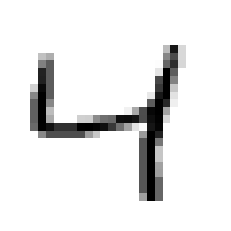

In [7]:
#To view a digit from the dataset, we will be using matplotlib's imshow() function

import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = x.iloc[2].to_numpy()
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation = 'nearest')
plt.axis('off')
plt.show()

In [8]:
y[2]

'4'

In [9]:
#because the label is a string, let's cast y to integers
y = y.astype(int)
y.dtype

dtype('int32')

## Set aside a train and test data
- MNIST is already split into a training and test set

In [10]:
x_train, x_test, y_train, y_test = x[:60000], x[:10000], y[:60000], y[:10000]

## Using Convolutional Neural Networks

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Reshape, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import *

- initiate sequential class since there are various layers to build CNN which must all be in sequence 
- add the first convolutional layer
- apply pooling operation to reduce the dimensions of the feature maps. reduces the number of parametes to learn and reduces computation in the neural network
- apply the dropout technique to prevent overfitting
- Flatten to convert the dataset into a 1D array for input into the next layer.
- use a dense class to create a fully connected layer and output layer
- softmax is used for the output layer to bring the output of the neural network to a probability distribution over predicting classes

In [12]:
#intializing CNN and adding a convolutional layer

model = Sequential()
model.add(Reshape((28,28,1), input_shape = x.shape[1:]))
model.add(Conv2D(filters = 8, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(rate = 0.25))

#add two convolutional layer
model.add(Conv2D(filters = 16, kernel_size =3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 32 , kernel_size = 3, activation ='relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(rate = 0.25))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(10, activation = 'softmax'))

In [13]:
#compile the model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [14]:
#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                    

In [15]:
#fit the model on the training set
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 63s 31ms/step - loss: 2.2031 - accuracy: 0.2906
Epoch 2/50
1875/1875 [==============================] - 59s 31ms/step - loss: 1.3174 - accuracy: 0.5497
Epoch 3/50
1875/1875 [==============================] - 73s 39ms/step - loss: 0.8861 - accuracy: 0.7192
Epoch 4/50
1875/1875 [==============================] - 70s 37ms/step - loss: 0.7175 - accuracy: 0.7720
Epoch 5/50
1875/1875 [==============================] - 62s 33ms/step - loss: 0.5851 - accuracy: 0.8124
Epoch 6/50
1875/1875 [==============================] - 60s 32ms/step - loss: 0.5131 - accuracy: 0.8348
Epoch 7/50
1875/1875 [==============================] - 60s 32ms/step - loss: 0.4638 - accuracy: 0.8520
Epoch 8/50
1875/1875 [==============================] - 60s 32ms/step - loss: 0.4267 - accuracy: 0.8671
Epoch 9/50
1875/1875 [==============================] - 51s 27ms/step - loss: 0.4094 - accuracy: 0.8764
Epoch 10/50
1875/1875 [==============================] - 50s 27m

In [16]:
np.set_printoptions(formatter = {'float': '{:0.2f}'.format})

In [23]:
#predictions
pred = model.predict(x_test)
pred[:5]

313/313 [==============================] - 4s 12ms/step


array([[0.00, 0.00, 0.01, 0.07, 0.00, 0.76, 0.00, 0.00, 0.08, 0.07],
       [1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
       [0.00, 0.00, 0.00, 0.00, 0.90, 0.00, 0.00, 0.01, 0.00, 0.10],
       [0.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
       [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 1.00]],
      dtype=float32)

In [18]:
y_pred = [np.argmax(pred[i]) for i in range(len(pred))]
y_pred[:10]

[5, 0, 4, 1, 9, 2, 1, 3, 1, 4]

In [19]:
print(y_test[:10])

0    5
1    0
2    4
3    1
4    9
5    2
6    1
7    3
8    1
9    4
Name: class, dtype: int32


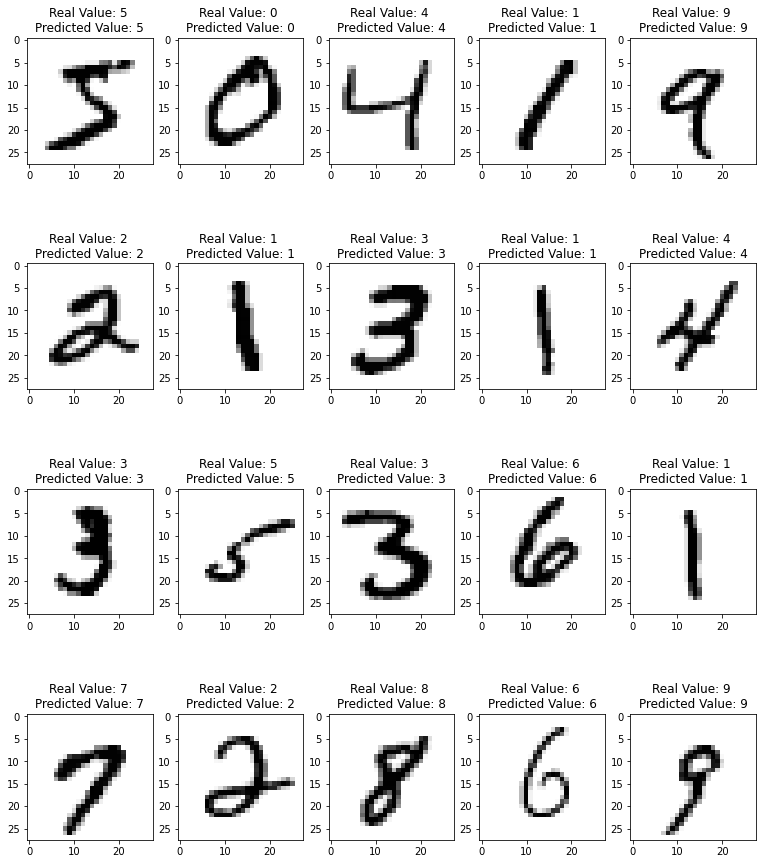

In [31]:
#Visualising predictions
y_list = list(y_test)

plt.figure(figsize = (15,20))
for i in range(20):
    plt.subplot(4,5, i+1)
    some_val = x_test.iloc[i].to_numpy()
    some_val_image = some_val.reshape(28,28)
    plt.imshow(some_val_image, cmap = mpl.cm.binary)
    plt.subplots_adjust(bottom = 0.1, right = 0.8, top = 0.7)
    plt.title(f'Real Value: {y_list[i]} \n'+ f'Predicted Value: {y_pred[i]}')